In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
from sklearn import preprocessing
from sklearn import model_selection, linear_model, metrics
%pylab inline

titanic = pd.read_csv("train.csv")

titanic.head()
titanic_x_v = titanic.loc[:,['Survived', 'Sex', 'SibSp','Parch', 'AgeFilled',]]
titanic_x_v.reindex()
titanic_org = titanic.copy()



Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [617]:
"""Step 1, fill null age with meadian"""

titanic["Age"].median()


28.0

In [618]:
#fill up then check "AgeFilled"
titanic["AgeFilled"] = titanic["Age"]
titanic["AgeFilled"] = titanic["AgeFilled"].fillna(titanic["Age"].median())
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeFilled      891 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [619]:
"""Step 2, select 4 "x"(independient) variables"""
titanic = titanic.loc[:,['Survived', 'Sex', 'SibSp','Parch', 'AgeFilled',]]
#check the colums
titanic.columns


Index(['Survived', 'Sex', 'SibSp', 'Parch', 'AgeFilled'], dtype='object')

In [620]:
"""Step 3, create dummy variables"""

titanicDummy = pd.get_dummies(titanic,columns=["Sex"],drop_first=True)
titanicDummy.head()
titanicDummy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived     891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
AgeFilled    891 non-null float64
Sex_male     891 non-null uint8
dtypes: float64(1), int64(3), uint8(1)
memory usage: 28.8 KB


In [621]:
"""Step 4, split train data and validate data"""

traindata, validatedata = model_selection.train_test_split(titanicDummy,train_size=0.8,random_state = 33, shuffle=True)
print(traindata)



     Survived  SibSp  Parch  AgeFilled  Sex_male
461         0      0      0      34.00         1
670         1      1      1      40.00         0
877         0      0      0      19.00         1
664         1      1      0      20.00         1
44          1      0      0      19.00         0
809         1      1      0      33.00         0
219         0      0      0      30.00         1
94          0      0      0      59.00         1
402         0      1      0      21.00         0
316         1      1      0      24.00         0
182         0      4      2       9.00         1
287         0      0      0      22.00         1
89          0      0      0      24.00         1
517         0      0      0      28.00         1
353         0      1      0      25.00         1
178         0      0      0      30.00         1
41          0      1      0      27.00         0
787         0      4      1       8.00         1
305         1      1      2       0.92         1
327         1      0

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [622]:
#split between DV and IV
y_train = traindata["Survived"]
X_train = traindata.drop("Survived",axis = 1)
X_train.head()

,SibSp,Parch,AgeFilled,Sex_male
461,0,0,34.0,1
670,1,1,40.0,0
877,0,0,19.0,1
664,1,0,20.0,1
44,0,0,19.0,0


In [623]:
y_validate = validatedata["Survived"]
X_validate = validatedata.drop("Survived",axis = 1)

In [624]:
"""Step 5, setup the regression model"""

logregression = linear_model.LogisticRegression(random_state=25)
logreg = logregression.fit(X_train,y_train)
y_pred = logreg.predict(X_validate)


In [625]:
for i in range(len(X_validate.columns)):
    print("Variable: ", X_validate.columns[i],"\t", " coefficients: ", logreg.coef_[0][i])

Variable:  SibSp 	  coefficients:  -0.24657983364389222
Variable:  Parch 	  coefficients:  -0.05211670266191097
Variable:  AgeFilled 	  coefficients:  -0.011878576753252256
Variable:  Sex_male 	  coefficients:  -2.464605434511426


In [626]:
print(metrics.classification_report(y_validate, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.87      0.84       107
          1       0.78      0.71      0.74        72

avg / total       0.80      0.80      0.80       179



In [627]:
AUCscore = metrics.roc_auc_score(y_validate, y_pred)
print(AUCscore)


0.7887461059190032


In [628]:
metrics.accuracy_score(y_validate, y_pred)

0.8044692737430168

In [629]:
metrics.explained_variance_score(y_validate, y_pred)

0.1931464174454829

In [630]:
fpr,tpr, threshold = metrics.roc_curve(y_validate, y_pred)

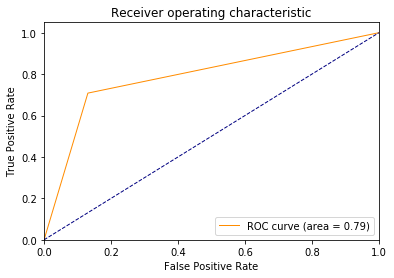

In [631]:
#graph ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % AUCscore)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [632]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




Confusion matrix, without normalization
[[93 14]
 [21 51]]
Normalized confusion matrix
[[0.87 0.13]
 [0.29 0.71]]


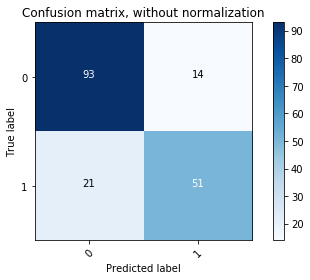

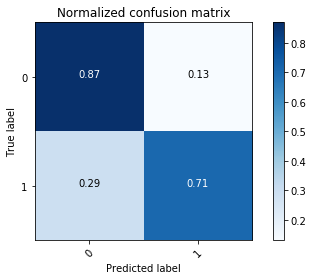

In [633]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_validate, y_pred)
np.set_printoptions(precision=2)
class_names = y_validate.unique()
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [634]:
"""Following the same way above, test "test.csv" and creat "titanic_submission.csv" for Kaggle challenge"""
X_submit = pd.read_csv("test.csv")
X_submit.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [635]:
#fix the null data again!

X_submit.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [636]:
X_submit["Sex"].value_counts() #check if it works

male      266
female    152
Name: Sex, dtype: int64

In [637]:
#prior to manipulation
X_submit_org = X_submit.copy()

In [638]:
X_submit["AgeFilled"] = X_submit["Age"]
X_submit["AgeFilled"] = X_submit["AgeFilled"].fillna(titanic_org["Age"].median())

In [639]:
### second manipulation, select only Sex, SipSp, Parch, AgeFilled as X_train data, y_train data is survived.
X_submit= X_submit.loc[:,[ 'Sex', 'SibSp','Parch', 'AgeFilled',]]
X_submit.columns




Index(['Sex', 'SibSp', 'Parch', 'AgeFilled'], dtype='object')

In [640]:
### third manipulation, create dummy variable
X_submit_dummy =  pd.get_dummies(X_submit,columns=['Sex'],drop_first=True) #k-1
X_submit_dummy.head()


,SibSp,Parch,AgeFilled,Sex_male
0,0,0,34.5,1
1,1,0,47.0,0
2,0,0,62.0,1
3,0,0,27.0,1
4,1,1,22.0,0


In [641]:
y_submit = logreg.predict(X_submit_dummy)

In [642]:
#here is preseiction
y_submit

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [643]:
#let's create a blank Dataframe with X_submit index for our submission
submission = pd.DataFrame()

In [644]:
#now put passengerid into the DF
submission["PassengerId"]  =  X_submit_org["PassengerId"]



In [645]:
#...and put the prediction into the DF
submission["Survived"] = y_submit

In [646]:
submission.head() #check

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [647]:
submission.to_csv("titanic_submission.csv", index = False)